

# 📊 O Tech Challenge

O Problema:
    
    Você é um(a) profissional encarregado(a) de desenvolver um modelo preditivo de regressão para prever o valor dos
    custos médicos individuais cobrados pelo seguro de saúde.
    A base de dados para este desafio pode ser algo como o demonstrado no exemplo a seguir:

Este dataset contém informações detalhadas sobre clientes de seguros, incluindo idade, sexo, índice de massa corporal (IMC), número de filhos, se fuma ou não e região.

Ele foi retirado do Kaggle no link: https://www.kaggle.com/datasets/thedevastator/prediction-of-insurance-charges-using-age-gender

In [33]:
import pandas as pd
# IMPORT DATASET
url = 'https://raw.githubusercontent.com/FIAP-5IADT-GRUPO85/tech_challenge_fase_01/main/Dataset/insurance-grupo-85.csv'
# df = pd.read_csv('insurance.csv', sep=",")
df = pd.read_csv(url)



# 📊 CONHECENDO A BASE

In [2]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 8)

##Será que precisaremos fazer algum tratamento para dados faltantes? E para dados categóricos? Para responder essas perguntas usaremos os comandos:  df.info() e df.isnull().sum() para identificar os tipos de dados e analisar se temos dados faltantes.
## Identicamos os tipos de dados: numéricos (age, bmi, children e charges) e categóricos(sex, smoker, region) e identificamos também que a base não possui valores nulos.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [5]:
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



## Continuando a análise exploratória dos dados.

##Abaixo obtemos os valores mínimos e máximos de cada variável numérica, além de verificar count, a média de valores para cada coluna e a divisão em percentual de valores de cada coluna da base. Mais a frente veremos alguns histogramas e gráficos que juntamente com essas informações podem nos dar vários insights sobre a base.

In [6]:
df.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


## Abaixo identificamos quantos valores únicos existe em cada coluna. Para saber se a base possui algum comportamento estranho ou valores que não fazem sentido. Como por exemplo 100 uniques na coluna children ou smoke com unique 5. No caso dessa base, identificamos que os uniques estão coerentes.

In [7]:
df.nunique()

index       1338
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
# Faz a remoção da coluna Index pois a mesma não é representativa no estudo do modelo
df = df.drop('index', axis=1)

# 📊 HISTOGRAMAS - ENTENDER AS VARIÁVEIS NUMÉRICAS LINEARES

 O histograma é importante pra saber com está a distribuição dos dados da base e entender a representação e o significado dos dados, ou seja, o que esses dados significam na base.

🔹 1. Histogramas → Quando usar?

 📊 Objetivo: Ver a distribuição de uma variável numérica (concentração, assimetria, outliers).
  
 ✅ Use quando a variável for numérica contínua, como:
    * age, bmi, charges


📌 Exemplos:
	•	bmi tem distribuição normal? Muitos pacientes obesos?
	•	age tem mais jovens ou adultos?
	•	charges tem outliers?

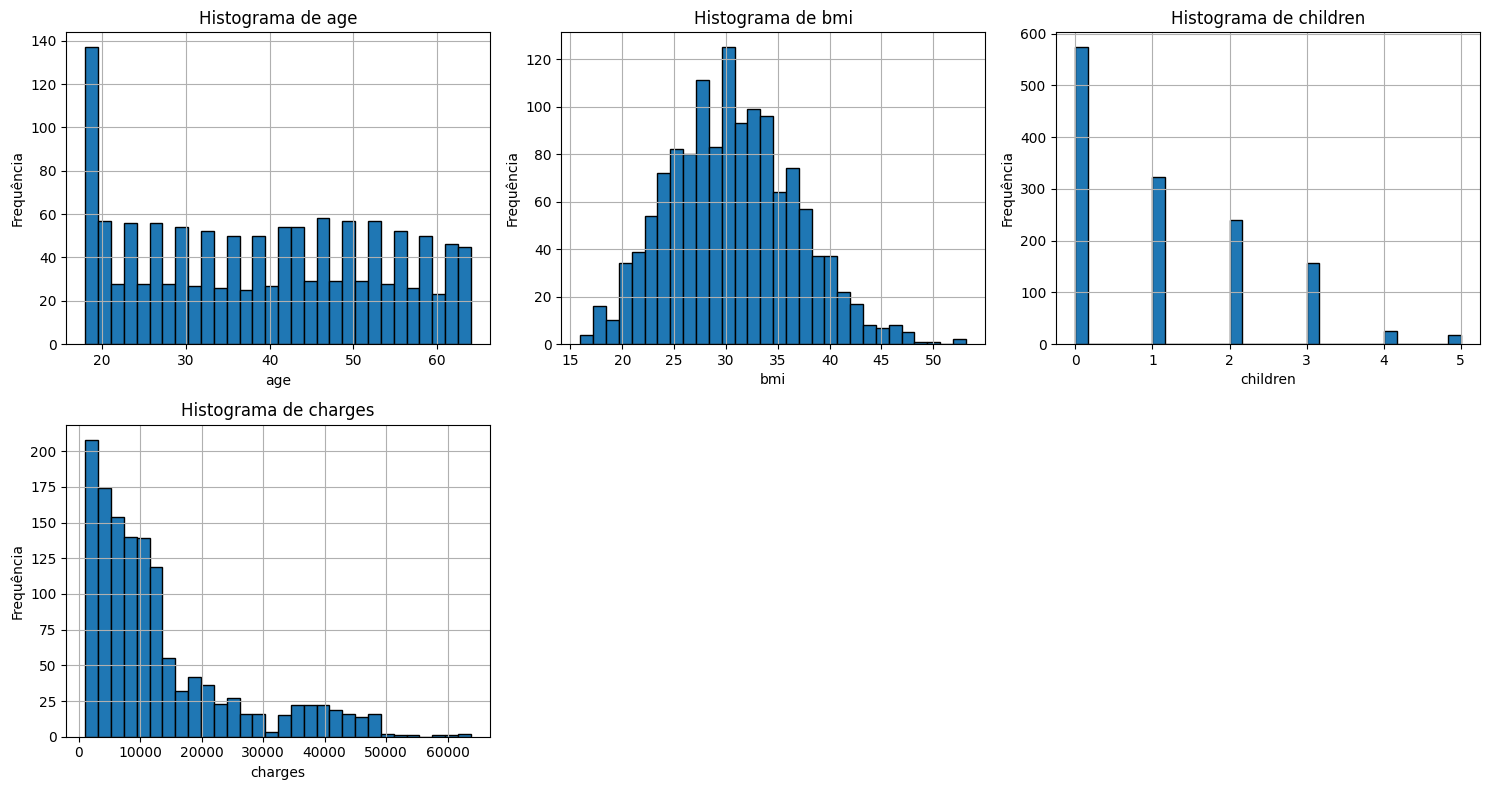

In [9]:
import matplotlib.pyplot as plt #gráficos

# Criar histogramas para cada coluna
plt.figure(figsize=(15, 8))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 3, i)
    df[column].hist(bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


**age**: Acima de 20 e abaixo de 64 anos a base apresenta um número equilibrado de pessoas que possuem plano. Isso mostra que temos pessoas todas as idades nesse intervalo. E também notamos um aumento na quantidade de pessoas que possuem plano entre 18 e 20 anos. Uma caracteristica que chamou atenção foi não ter plano para menores de 18 anos. 50% da base está entre 18 e 39 anos.

**bmi** (imc): Uma distribuição aproximadamente simétrica e levemente concentrada em torno da média, ou seja, com concentração de pessoas que possuem bmi em 30.

**charges**: Uma maior concentração de pessoas que pagam abaixo de 10.000. 75% da base apresenta um charge menor que aproximadamente 16640, sendo que os valores podem chegar até aproximadamente 63770.

**children**: Notamos que 75% da base tem até 2 filhos, sendo que temos um número muito alto de pessoas que não tem filho e possuem plano (pelo menos 25%) e conforme o número de filhos aumenta, a quantidade de pessoas que possui plano diminui.




# 📊 BOXPLOTS / DISTIBUIÇÃO - ENTENDER AS VARIÁVEIS CATEGÓRICAS

🔹 2. Boxplots → Quando usar?

📦 Objetivo: Comparar a distribuição de uma variável numérica com base em categorias.

✅ Use quando você tiver:
	•	Eixo X: variável categórica
	•	Eixo Y: variável numérica

📌 Exemplos:
	•	charges por smoker (fumantes pagam mais?)
	•	charges por sex (existe diferença entre homens/mulheres?)
	•	charges por region (diferenças regionais?)


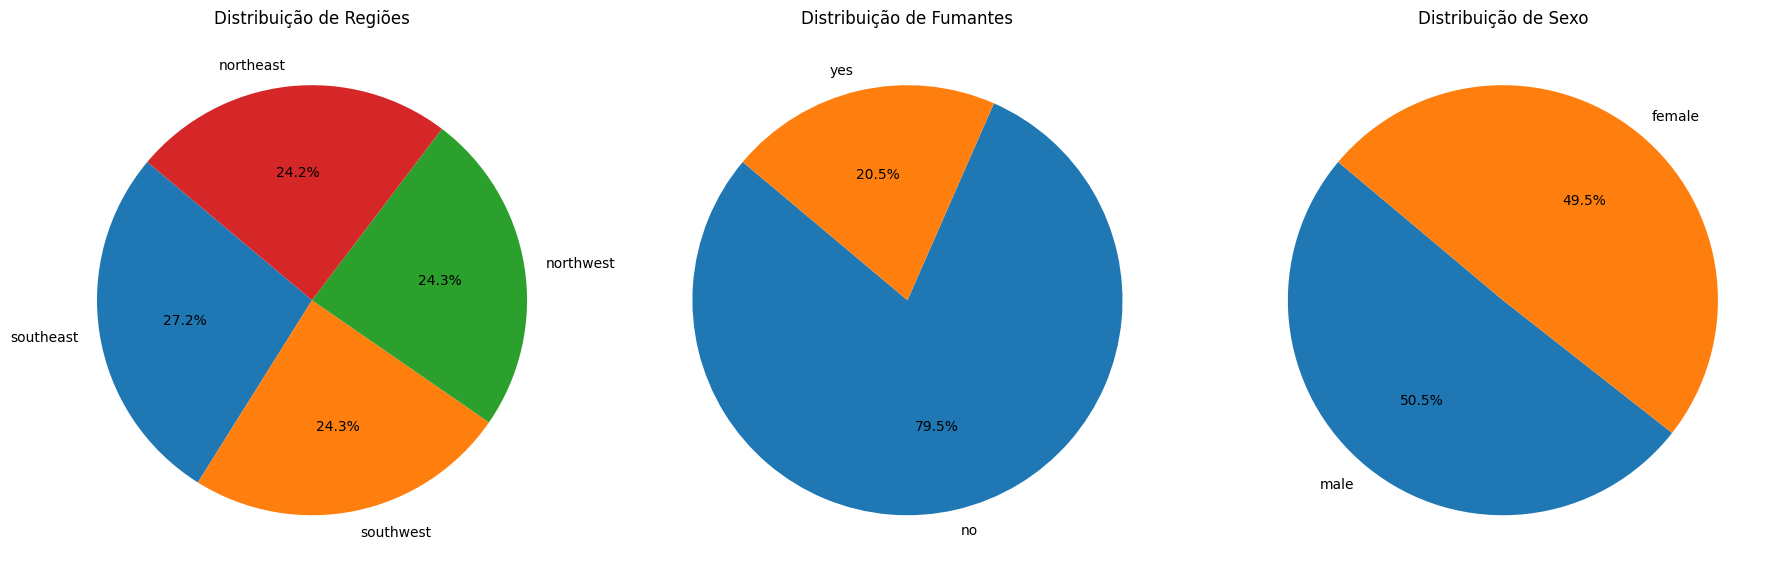

In [10]:
# Cria uma figura com 3 subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1 – Região
axs[0].pie(
    df['region'].value_counts(),
    labels=df['region'].value_counts().index,
    autopct='%1.1f%%',
    startangle=140
)
axs[0].set_title('Distribuição de Regiões')

# Gráfico 2 – Fumantes
axs[1].pie(
    df['smoker'].value_counts(),
    labels=df['smoker'].value_counts().index,
    autopct='%1.1f%%',
    startangle=140
)
axs[1].set_title('Distribuição de Fumantes')

# Gráfico 3 – Sexo
axs[2].pie(
    df['sex'].value_counts(),
    labels=df['sex'].value_counts().index,
    autopct='%1.1f%%',
    startangle=140
)
axs[2].set_title('Distribuição de Sexo')

# Ajusta o layout pra não sobrepor
plt.tight_layout()
plt.show()

Regions e Sex:
Há uma distribuição equilibrada entras as regiões e também entre sexo dos segurados.

Fumantes: 20.5% dos segurados fumam.

Ao analisar as distribuições, aparentemente não há um número considerável de outliers, mas continuaremos as análises para verificar melhor essa hipótese.

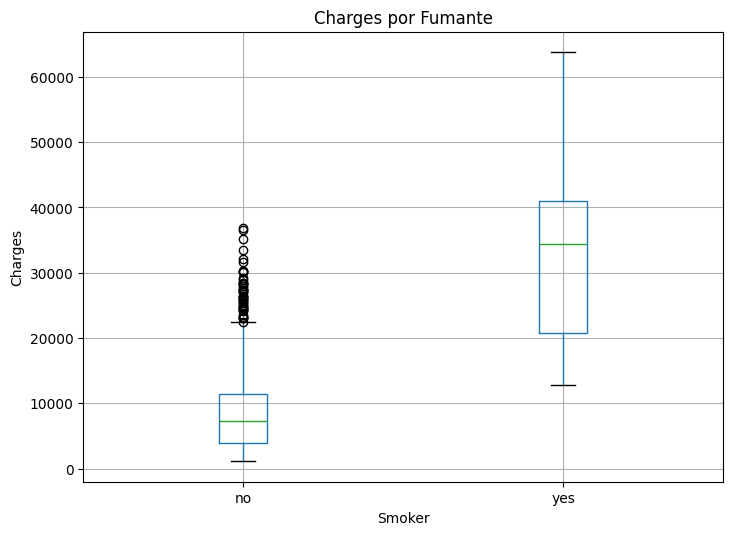

In [11]:

df.boxplot(column='charges', by='smoker', figsize=(8, 6))
plt.title("Charges por Fumante")
plt.suptitle("")  # remove o título automático
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

Aqui conseguimos identificar que a maior concentração de fumantes pagam mais caro do que maior concentração dos não fumantes. Então, ao que parece há um impacto muito alto de smoker em charges. Comprovaremos isso pela correlação, que será exibida mais a frente.

Mas também observamos alguns outliers: não fumantes com charges bem alto, mas ainda não sabemos o motivo. Pode ser que tenha alguma outra variável influenciando esse alto valor de charges nessas amostras.


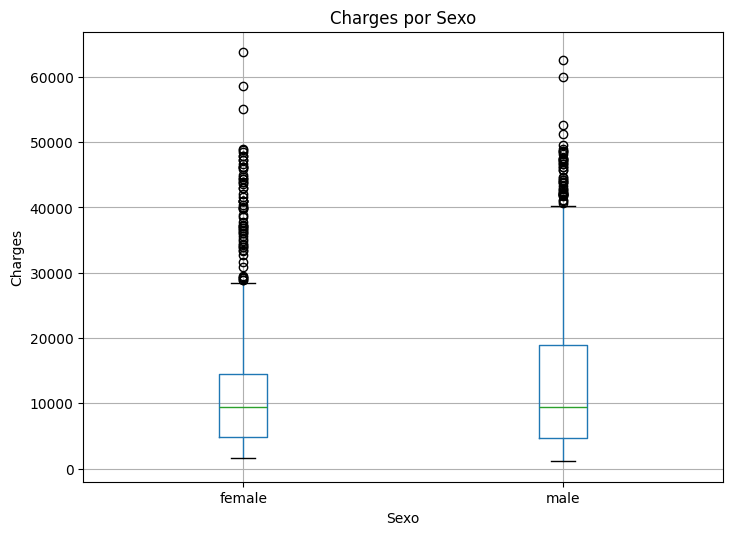

In [12]:
df.boxplot(column='charges', by='sex', figsize=(8, 6))
plt.title("Charges por Sexo")
plt.suptitle("")
plt.xlabel("Sexo")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

Aqui já não vemos grande impacto de sexo em charges. Temos outliers em ambos, porém os valores de charges não são alterados de forma significante quando altera o sexo.

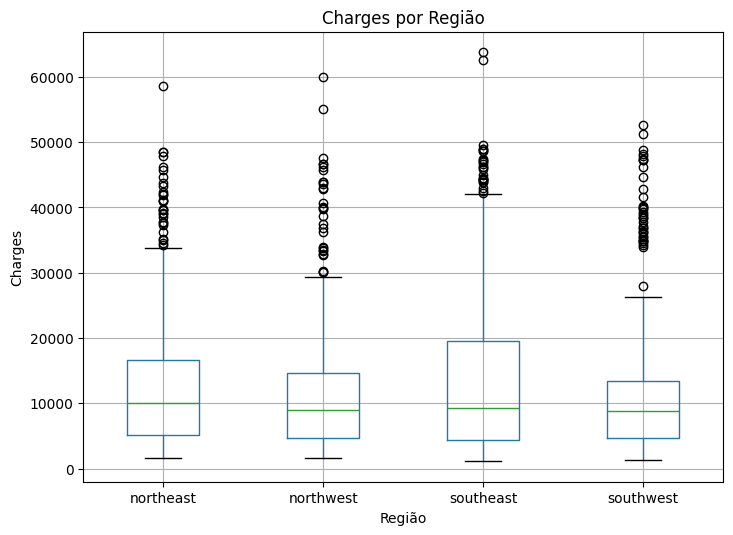

In [13]:
df.boxplot(column='charges', by='region', figsize=(8, 6))
plt.title("Charges por Região")
plt.suptitle("")
plt.xlabel("Região")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

Região também não explica nenhuma grande variedade em charges, sendo possível identificar alguns outliers em todas elas.

#📊 SCATTER PLOTS - ENTENDER A RELAÇÃO ENTRE DUAS VARIÁVEIS NUMÉRICAS

🔹 3. Scatter plots (dispersão) → Quando usar?

🔘 Objetivo: Ver relação entre duas variáveis numéricas. Te ajuda a ver se existe tendência linear (importante pra regressão).
tipo o quanto uma variável explica a outra.

✅ Use quando ambas variáveis forem numéricas.

📌 Exemplos:
	•	age vs charges: pessoas mais velhas pagam mais?
	•	bmi vs charges: o IMC tem correlação com o custo?

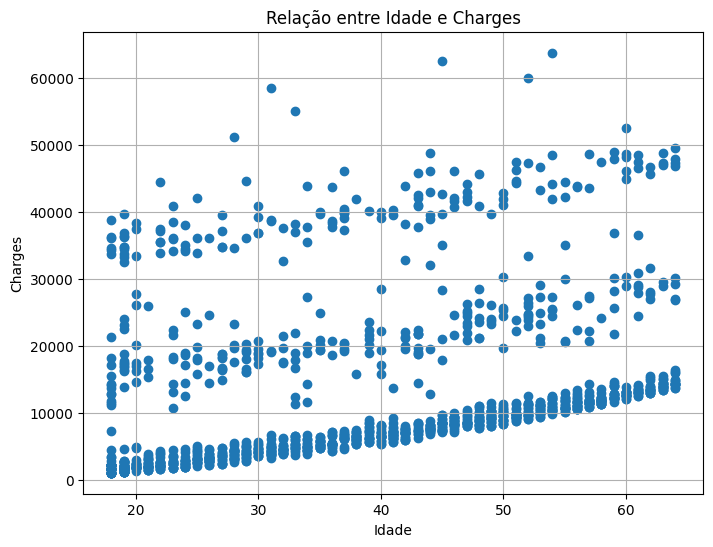

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['charges'])
plt.title("Relação entre Idade e Charges")
plt.xlabel("Idade")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

Há uma tendência de aumento de charges conforme a age aumenta, ninguém paga menos de 10.000 quando tem mais de 60 anos por exemplo. Com existe uma variância entre Age e Charges, continuaremos as análise das outras variáveis.


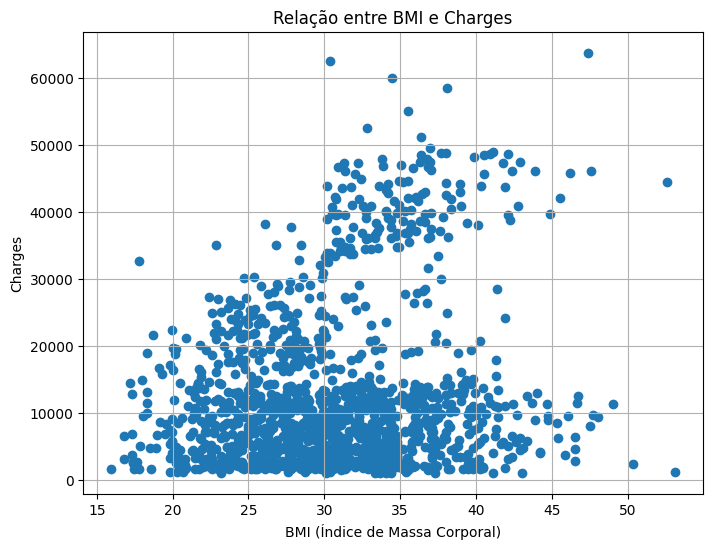

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['charges'])
plt.title("Relação entre BMI e Charges")
plt.xlabel("BMI (Índice de Massa Corporal)")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

Aqui podemos ver que pessoas que pagam mais caro, possuem bmi acima de 30.

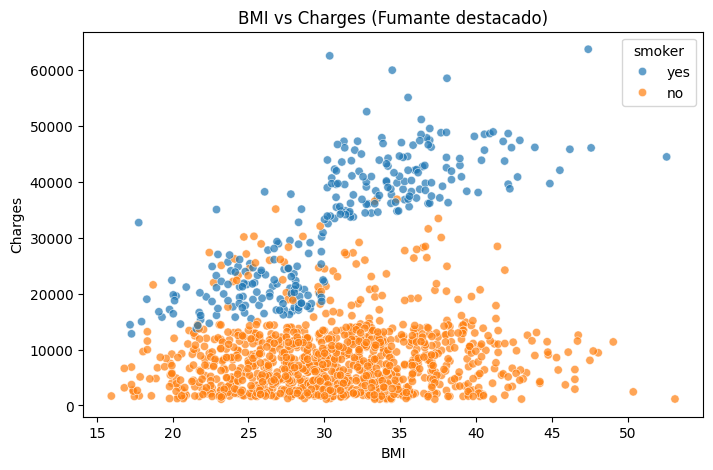

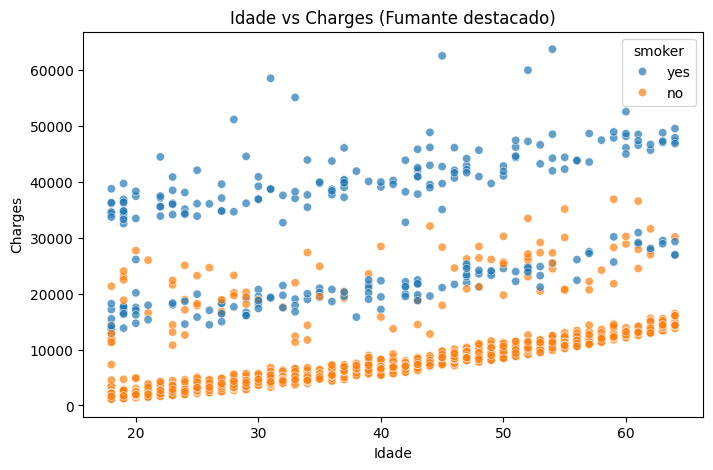

In [16]:
# Charges vs BMI (com smoker destacado)
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('BMI vs Charges (Fumante destacado)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Charges vs Age (com smoker destacado)
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('Idade vs Charges (Fumante destacado)')
plt.xlabel('Idade')
plt.ylabel('Charges')
plt.show()

Aqui fizemos uma análise de como smoker (fumantes)  influenciam em charges dependendo do bmi e também de age, e verificamos que smoker tem grande peso em charges do que bmi e age.

Smoker vs BMI: A maioria das pessoas que são fumantes e tem alto BMI pagam mais caro. As duas variáveis juntas possuem boa relação com aumento de charges.

Smoker vs Idade: Independente da idade, pessoas que são fumantes pagam mais caro. As duas variáveis juntas não ajudam muito no aumento de charges, ou seja, idade não contribui muito para o aumento de charges quando a pessoa é fumante.


Em seguida para confirmarmos o peso das variáveis em charges, vamos analisar a correlação entre as variáveis. Porém antes precisamos transformar as variáveis categórias em numéricas.

Como temos categoria nominais, sem hierarquia entre elas, escolhemos o OneHotEncoder, pois, apesar da desvantagem de criar mais dimensões  ainda assim, vale o preço de garantirmos que o modelo nao vai achar que uma regiao 4 é melhor do que a região 1, por exemplo.




In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



# Seleciona apenas as colunas categóricas
cat_cols = ['sex', 'smoker', 'region']
cat_data = df[cat_cols]

# Cria o encoder com a versão nova (sparse_output)
#encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar multicolinearidade
encoder = OneHotEncoder(sparse_output=False)
# Ajusta e transforma
encoded_array = encoder.fit_transform(cat_data)

# Cria um DataFrame com os nomes das colunas novas
encoded_cols = encoder.get_feature_names_out(cat_cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

# Junta com o DataFrame original, removendo as colunas categóricas antigas
df_encoded = pd.concat([df.drop(cat_cols, axis=1), encoded_df], axis=1)

# Agora df_encoded está pronto com variáveis categóricas convertidas em dummies!

df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


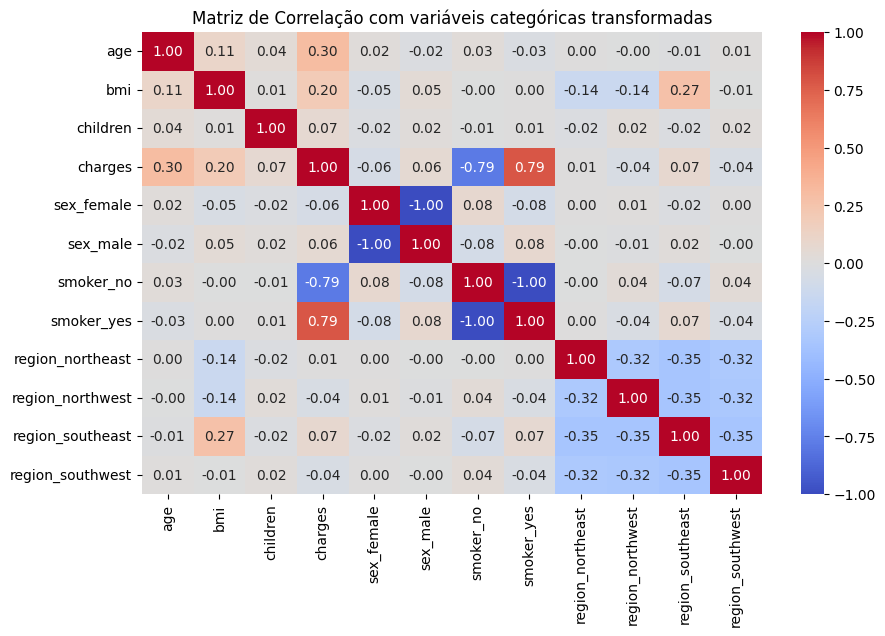

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria a matriz de correlação com o DataFrame codificado
correlation_matrix = df_encoded.corr(numeric_only=True)

# Exibe como heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação com variáveis categóricas transformadas")
plt.show()

Aqui temos a confirmação de que a variável smoker tem uma forte correlação com charges, o que explica e confirma nossas hipóteses de smoker influenciar no aumento dos charges.

In [19]:
# Define as features mais relevantes manualmente
feature_cols = df_encoded.columns.difference(['charges'])
#X = df_encoded[feature_cols]
X = df_encoded[feature_cols]

# Define o target
y = df_encoded['charges']

# 📊 SEPARANDO OS DADOS EM TREINO E TESTE

In [20]:
from sklearn.model_selection import train_test_split

# Divide os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#📊 Regressão Linear

In [22]:
from sklearn.linear_model import LinearRegression

# Instancia o modelo
lin_reg = LinearRegression()

# Treina o modelo
lin_reg.fit(X_train_scaled, y_train)



LinearRegression()

In [23]:
from sklearn.metrics import r2_score

# Faz previsões com os dados de teste
y_pred = lin_reg.predict(X_test_scaled)

# Calcula o R²
r2 = r2_score(y_test, y_pred)

# Exibe formatado
print(f"R² do modelo: {r2:.4f}")


R² do modelo: 0.7836


Bom, pela métrica do coeficiente de determinação, ou r², tivemos uma variancia explicada de aproximadamente 78.36%, o que quer dizer que o modelo explica 78.36% da variância no alvo (charges). Mas vamos avaliar o nosso modelo segundo outras metricas também: Erro Absoluto Médio (MAE), Erro Percentual Médio Absoluto (MAPE) e Raiz do Erro Quadrático Médio (RMSE).

In [24]:
from sklearn.metrics import mean_absolute_error

# Calcula o MAE entre os valores reais e previstos
mae = mean_absolute_error(y_test, y_pred)

# Exibe formatado em reais
print(f"Erro médio absoluto (MAE): R$ {mae:,.2f}")

Erro médio absoluto (MAE): R$ 4,181.19


In [25]:
import numpy as np

# Calcula o MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Exibe formatado
print(f"Erro percentual médio (MAPE): {mape:.2f}%")

Erro percentual médio (MAPE): 46.89%


In [26]:
# RMSE

from sklearn.metrics import mean_squared_error
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.

lin_mse = mean_squared_error(y_test, y_pred) #erro quadratico medio
lin_rmse = np.sqrt(lin_mse) # raiz quadrada


In [27]:

print(f"Métricas do modelo de Regressão Linear: ")
print(f"R²: {r2:.4f}")
print(f"Erro quadrático medio (RMSE): R$ {lin_rmse:,.2f}")
print(f"Erro médio absoluto (MAE): R$ {mae:,.2f}")
print(f"Erro percentual médio (MAPE): {mape:.2f}%")
print(f"RMSE: {lin_rmse:.2f}")

Métricas do modelo de Regressão Linear: 
R²: 0.7836
Erro quadrático medio (RMSE): R$ 5,796.28
Erro médio absoluto (MAE): R$ 4,181.19
Erro percentual médio (MAPE): 46.89%
RMSE: 5796.28


# 📊Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Instancia o modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treina com os dados
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Faz previsões
y_pred_rf = rf_model.predict(X_test_scaled)

# R²
r2 = r2_score(y_test, y_pred_rf)
print(f"R² (Random Forest): {r2:.4f}")

# MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"MAE (Random Forest): R$ {mae:,.2f}")

# MAPE
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
print(f"MAPE (Random Forest): {mape:.2f}%")

#MRSE

rf_mse = mean_squared_error(y_test, y_pred_rf) #erro quadratico medio
rf_rmse = np.sqrt(rf_mse) # raiz quadrada

print(f"RMSE: R$ {rf_rmse:,.2f}")

R² (Random Forest): 0.8632
MAE (Random Forest): R$ 2,549.74
MAPE (Random Forest): 30.45%
RMSE: R$ 4,609.11


# 📊 Árvore de Decisão

In [30]:
# Utilizando o modelo de Arvore de Decisão para Regressão
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Criando o modelo de árvore de decisão
tree_model = DecisionTreeRegressor(max_depth=10,random_state=42)
# Treinando o modelo com os dados de treino sem normalização e padronização
tree_model.fit(X_train_scaled, y_train)
# Avaliando o modelo com os dados de teste sem normalização e padronização
y_pred_tree = tree_model.predict(X_test_scaled)
# Calculando o R² para os dados sem normalização e padronização
r2_tree = r2_score(y_test, y_pred_tree)
print(f"R² (Árvore de Recisão): {r2_tree:.4f}")

# MAE
mae = mean_absolute_error(y_test, y_pred_tree)
print(f"MAE (Árvore de Recisão): R$ {mae:,.2f}")

# MAPE
mape = np.mean(np.abs((y_test - y_pred_tree) / y_test)) * 100
print(f"MAPE (Árvore de Recisão): {mape:.2f}%")

#MRSE

rf_mse = mean_squared_error(y_test, y_pred_tree) #erro quadratico medio
rf_rmse = np.sqrt(rf_mse) # raiz quadrada

print(f"RMSE: R$ {rf_rmse:,.2f}")

R² (Árvore de Recisão): 0.7724
MAE (Árvore de Recisão): R$ 2,865.30
MAPE (Árvore de Recisão): 33.68%
RMSE: R$ 5,944.04


#📊 Comparativo geral dos modelos testados

<table border="1" cellspacing="0" cellpadding="6">
  <thead>
    <tr>
      <th>Modelo</th>
      <th>R²</th>
      <th>MAE (R$)</th>
      <th>MAPE (%)</th>
      <th>RMSE</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Regressão Linear</td>
      <td>0.7836</td>
      <td>R$ 4,181.19</td>
      <td>46.89%</td>
      <td>R$ 5796.28</td>
    </tr>
    <tr>
      <td>Random Forest</td>
      <td>0.8633</td>
      <td>R$ 2,552.58</td>
      <td>30.48%</td>
      <td>R$ 4,606.88</td>
    </tr>
    <tr>
      <td>Árvore de Decisão</td>
      <td>0.7724</td>
      <td>R$ 2,865.30</td>
      <td>33.68%</td>
      <td>R$ 5,944.04</td>
    </tr>   
  </tbody>
</table>

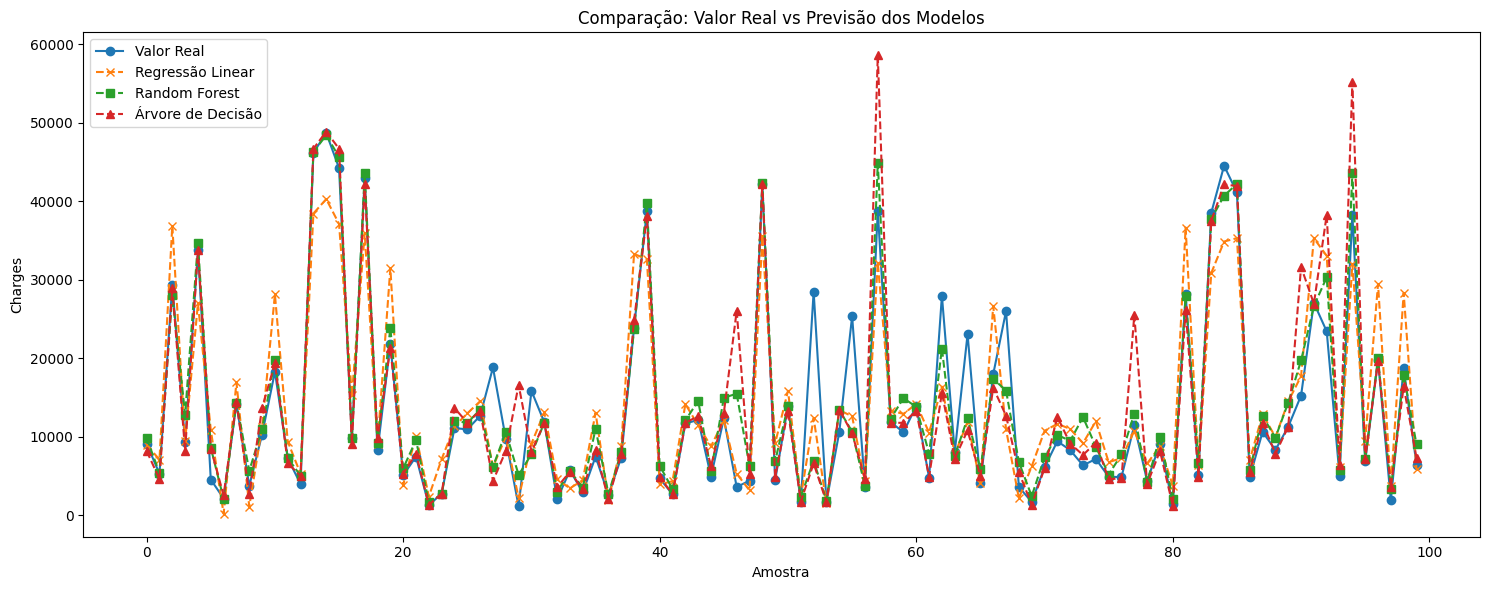

In [31]:
import matplotlib.pyplot as plt

# Seleciona um subconjunto para visualização (por exemplo, 50 primeiras amostras do teste)
n_samples = 100
indices = range(n_samples)

plt.figure(figsize=(15, 6))
plt.plot(indices, y_test.iloc[:n_samples], label='Valor Real', marker='o', linestyle='-')
plt.plot(indices, y_pred[:n_samples], label='Regressão Linear', marker='x', linestyle='--')
plt.plot(indices, y_pred_rf[:n_samples], label='Random Forest', marker='s', linestyle='--')
plt.plot(indices, y_pred_tree[:n_samples], label='Árvore de Decisão', marker='^', linestyle='--')

plt.title('Comparação: Valor Real vs Previsão dos Modelos')
plt.xlabel('Amostra')
plt.ylabel('Charges')
plt.legend()
plt.tight_layout()
plt.show()

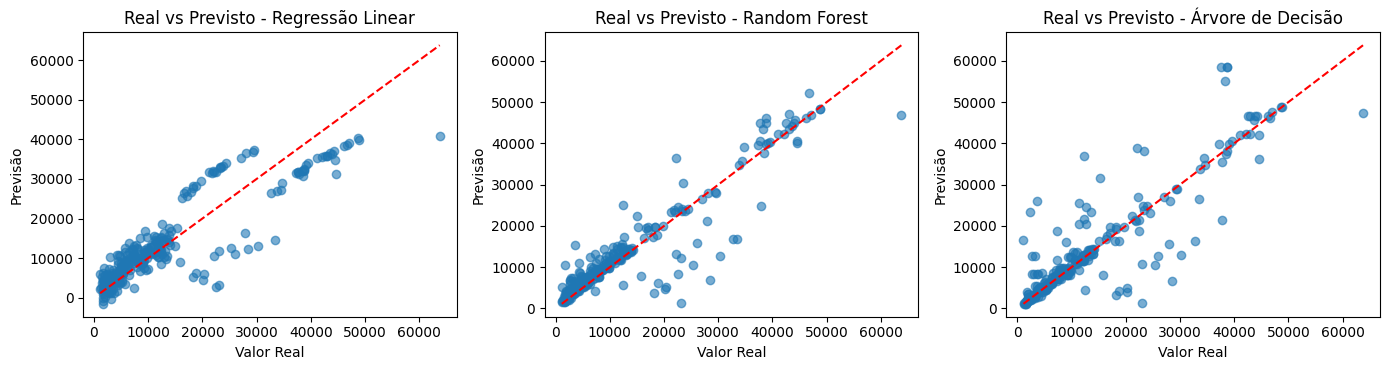

In [32]:
plt.figure(figsize=(14, 4))

# Dicionário com os resultados de previsão dos modelos
results = {
    "Regressão Linear": {"predictions": y_pred},
    "Random Forest": {"predictions": y_pred_rf},
    "Árvore de Decisão": {"predictions": y_pred_tree}
}

for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, res["predictions"], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel(f"Valor Real")
    plt.ylabel(f"Previsão")
    plt.title(f"Real vs Previsto - {name}")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt

# ✅ Conclusão Final do Modelo de Machine Learning

Durante este estudo, testamos diversos modelos de regressão aplicados à base de dados de seguros (`insurance.csv`), com o objetivo de prever o valor do seguro (`charges`) com base em variáveis como idade, IMC e se o cliente é fumante.

### 🔍 Modelos testados:

- **Regressão Linear**
- **Random Forest**
- **Árvore de Decisão**


### 📊 Melhores resultados obtidos:

- **Melhor modelo geral**: Random Forest
- **R²:** 0.8633 → Explica ~86% da variação no valor do seguro
- **MAE:** R\$ 2.552,58 → Erro absoluto médio em reais
- **MAPE:** 30,48% → Erro percentual médio
- **RMSE:** R\$ 4,606.88 → Raiz do Erro Quadrático Médio


### ✅ Conclusão:

- A análise da base antes de realizar a aplicação dos modelos é de grande importancia pois auxilia na tomada de decisão para o tratamento dos dados. Por exemplo: verificamos a possibilidade de remover a coluna index, fazendo com que os modelos tivessem melhor performance.

- Pelas métricas apresentadas elegemos o Random Forest como o melhor algoritmo para prever a variavel charges na base estudada. Isso pode ser verificado no valor da métrica R² e RMSE. O Coeficiente de determinação (R²) que explica o quão bem as váriaveis independentes (entrada) explicam a variação dos valores reais de charges. O RMSE nesse caso explica o quanto o modelo erra dando ênfase aos erros mais discrepantes em média o modelo comete um erro de R\$ 4,606.88 ao definir o valor de charges a partir das variáveis de entrada. Na média, o modelo (em todo o range de dados) erra em R\$ 2.552,58 (MAE) ou em 30,48% (MAPE) que é aceitável nesse cenário.
